### NumPy

* ndarray 만들기
    * ndarray 객체는 arange()와 array([])로 만들 수 있음.

> NumPy를 사용하기 위해 ndarray 객체를 만들어야한다.ndarray 객체를 이용하면 파이썬에서 사용하는 대규모 데이터 집합을 n차원 배열로 담을 수 있다. ndarray를 그냥 array라고 부르기도 한다.

In [1]:
import numpy as np

# 아래 A와 B는 결과적으로 같은 ndarray 객체를 생성한다.
A = np.arange(5)
B = np.array([0, 1, 2, 3, 4]) # 파이썬 리스트를 numpy ndarray로 변환

# C는 조금 다름.
C = np.array([0, 1, 2, 3, '4'])

# D도 A, B와 같은 결과를 내지만, B의 방법 사용빈도가 많음
D = np.ndarray((5,), np.int64, np.array([0, 1, 2, 3, 4]))

print(A)
print(type(A))
print("--------------------------")
print(B)
print(type(B))
print("--------------------------")
print(C)
print(type(C))
print("--------------------------")
print(D)
print(type(D))

[0 1 2 3 4]
<class 'numpy.ndarray'>
--------------------------
[0 1 2 3 4]
<class 'numpy.ndarray'>
--------------------------
['0' '1' '2' '3' '4']
<class 'numpy.ndarray'>
--------------------------
[0 1 2 3 4]
<class 'numpy.ndarray'>


> numpy.ndarray도 array이므로 모든 element의 type이 동일해야 합니다. 여기서 파이썬의 유연함이 드러납니다. 문자열을 모두 숫자로 바꿀 수는 없지만 숫자는 모두 문자열로 바꿔 줄 수 있습니다. 그래서 숫자만 있던 ndarray에 문자열이 들어가면 모든 숫자를 문자열로 해석해서 array의 요건을 맞춰줍니다.

* 크기 (size, shape, ndim)
    * ndarray.size
    * ndarray.shape
    * ndarray.ndim
    * reshape()
        * size, shape, ndim는 각각 행렬 내 원소의 개수, 행렬의 모양, 행렬의 축(axis)의 개수를 의미
        * reshape() 메서드는 행렬의 모양을 바꿔줌
        * 모양을 바꾸기 전후 행렬의 총 원소 개수(size)가 맞아야 한다.

In [3]:
A = np.arange(10).reshape(2, 5)   # 길이 10의 1차원 행렬을 2X5 2차원 행렬로 바꿈.

print("행렬의 모양:", A.shape)
print("행렬의 축 개수:", A.ndim)
print("행렬 내 원소의 개수:", A.size)
A

행렬의 모양: (2, 5)
행렬의 축 개수: 2
행렬 내 원소의 개수: 10


array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [4]:
A = np.arange(10)
print('A: ', A)
B = np.arange(10).reshape(2,5)
print('B: ', B)
C = np.arange(10).reshape(3,3)  # 이 줄에서 에러가 난다.
print('C: ', C)

A:  [0 1 2 3 4 5 6 7 8 9]
B:  [[0 1 2 3 4]
 [5 6 7 8 9]]


ValueError: cannot reshape array of size 10 into shape (3,3)

> 원소의 개수가 행렬과 맞지 않아 에러가 난다.

* type
    * NumPy: numpy.array.dtype
    * 파이썬: type()

In [5]:
A= np.arange(6).reshape(2, 3)
print(A)
print(A.dtype)
print(type(A))
print("-------------------------")

B = np.array([0, 1, 2, 3, 4, 5])  
print(B)
print(B.dtype)
print(type(B))
print("-------------------------")

C = np.array([0, 1, 2, 3, '4', 5])
print(C)
print(C.dtype)
print(type(C))
print("-------------------------")

D = np.array([0, 1, 2, 3, [4, 5], 6])  # 이런 ndarray도 만들어질까요?
print(D)
print(D.dtype)
print(type(D))

[[0 1 2]
 [3 4 5]]
int64
<class 'numpy.ndarray'>
-------------------------
[0 1 2 3 4 5]
int64
<class 'numpy.ndarray'>
-------------------------
['0' '1' '2' '3' '4' '5']
<U21
<class 'numpy.ndarray'>
-------------------------
[0 1 2 3 list([4, 5]) 6]
object
<class 'numpy.ndarray'>


/tmp/ipykernel_423/130055213.py:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  D = np.array([0, 1, 2, 3, [4, 5], 6])  # 이런 ndarray도 만들어질까요?


 NumPy의 원소는 꼭 동일한 데이터 type이어야 합니다. NumPy의 메서드인 dtype은 NumPy ndarray의 "원소"의 데이터 타입을 반환해요.

반면에 파이썬 내장함수인 type(A)을 이용하면 행렬 A의 자료형이 반환됩니다.

여기서 재미있는 것은 D의 경우입니다. 이번에는 원소 하나를 list 객체로 바꿔 보았습니다. 위의 설명대로라면 NumPy의 원소는 꼭 동일한 데이터 type이어야 하므로 이번만큼은 에러가 날줄 알았는데, 떡하니 정상적으로 ndarray가 만들어집니다. 대신 D.dtype은 object를 리턴했습니다. 파이썬의 최상위 클래스는 바로 object입니다. 그러므로 Numpy는 dtype을 object로 지정해서라도 행렬 내 dtype을 일치시킬 수 있게 됩니다. 다행인 점은 이제 이런 상황을 방지하기 위해서 이런 기능을 deprecate 시켰다는 점이에요.

deprecate 라는 것은 이제 더 이상 관리하지 않는 기능을 뜻합니다. 메서드를 deprecate 할 예정일 때는 기능은 성공적으로 실행시키고 error가 아닌 warning 문구로 경고만 해주는데요. 그 기능을 더 이상 못쓰는 것은 아니지만 이제부터 관리를 하지 않을 테니 오류가 날 확률이 높다는 뜻입니다. 일반적으로 어떻게 코드를 수정해야 하는지 알려주니 메시지를 잘 읽어보는 것이 좋습니다. 여기서는 '... you must specify 'dtype=object' when creating the ndarray.' 라고 말해 주었네요. 코드를 작성하는 사람이 dtype을 직접 입력하여 오류를 방지하려는 의도

In [6]:
C = np.array([0,1,2,3,'4',5])
print(C[0])
print(type(C[0]))
print(C[4])
print(type(C[4]))
print("------------------------------")

D = np.array([0,1,2,3,[4,5],6], dtype=object)
print(D[0])
print(type(D[0]))
print(D[4])
print(type(D[4]))

0
<class 'numpy.str_'>
4
<class 'numpy.str_'>
------------------------------
0
<class 'int'>
[4, 5]
<class 'list'>


 * 특수 행렬
     * 단위행렬
     * 0 행렬
     * 1 행렬

In [7]:
# 단위행렬
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [8]:
# 0 행렬
np.zeros([2,3])

array([[0., 0., 0.],
       [0., 0., 0.]])

In [9]:
# 1행렬
np.ones([3,3])

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

* 브로드캐스트
    * [NumPy.org](https://numpy.org/devdocs/user/basics.broadcasting.html)

In [10]:
A = np.arange(9).reshape(3,3)
A

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [11]:
# ndarray A에 2를 상수배 했을 때,
A * 2

array([[ 0,  2,  4],
       [ 6,  8, 10],
       [12, 14, 16]])

In [12]:
# ndarray A에 2를 더했을 때,
A + 2

array([[ 2,  3,  4],
       [ 5,  6,  7],
       [ 8,  9, 10]])

In [13]:
# 3 X 3 행렬에 1 X 3 행렬을 더했을 때
A = np.arange(9).reshape(3,3)
B = np.array([1, 2, 3])
print("A:", A)
print("B:", B)
print("\nA+B:", A+B)

A: [[0 1 2]
 [3 4 5]
 [6 7 8]]
B: [1 2 3]

A+B: [[ 1  3  5]
 [ 4  6  8]
 [ 7  9 11]]


In [14]:
# 3 X 3 행렬에 3 X 1 행렬을 더했을 때
A = np.arange(9).reshape(3,3)
C = np.array([[1], [2], [3]])
print("A:", A)
print("C:", C)
print("\nA+C:", A+C)

A: [[0 1 2]
 [3 4 5]
 [6 7 8]]
C: [[1]
 [2]
 [3]]

A+C: [[ 1  2  3]
 [ 5  6  7]
 [ 9 10 11]]


In [15]:
# 3 X 3 행렬에 1 X 2 행렬을 더하는 것은 허용하지 않음. 
A = np.arange(9).reshape(3,3)
D = np.array([1, 2])
print("A:", A)
print("D:", D)
print("\nA+D:", A+D)

A: [[0 1 2]
 [3 4 5]
 [6 7 8]]
D: [1 2]


ValueError: operands could not be broadcast together with shapes (3,3) (2,) 

In [1]:
print([1,2]+[3,4])
print([1,2]+3)

[1, 2, 3, 4]


TypeError: can only concatenate list (not "int") to list

In [3]:
import numpy as np
print(np.array([1,2])+np.array([3,4]))
print(np.array([1,2])+3)

[4 6]
[4 5]


> 이렇게 ndarray와 상수, 또는 서로 크기가 다른 ndarray끼리 산술연산이 가능한 기능을 브로드캐스팅이라고 한다. Numpy가 파이썬 내장 리스트와 구별되는 큰 특징 중의 하나

* 슬라이스와 인덱싱

In [4]:
# 3 X 3 행렬의 첫번째 행을 구한다.
A = np.arange(9).reshape(3,3)
print("A:", A)
B = A[0]
print("B:", B)

# 0, 1을 인덱싱 하면 A의 첫번째 행에서 두번째 값을 참조.
# 아래 두 결과는 정확히 같다
print(A[0, 1])
print(B[1])

# 슬라이싱도 비슷.
A[:-1]

A: [[0 1 2]
 [3 4 5]
 [6 7 8]]
B: [0 1 2]
1
1


array([[0, 1, 2],
       [3, 4, 5]])

* NumPy 기본 인덱싱 배열

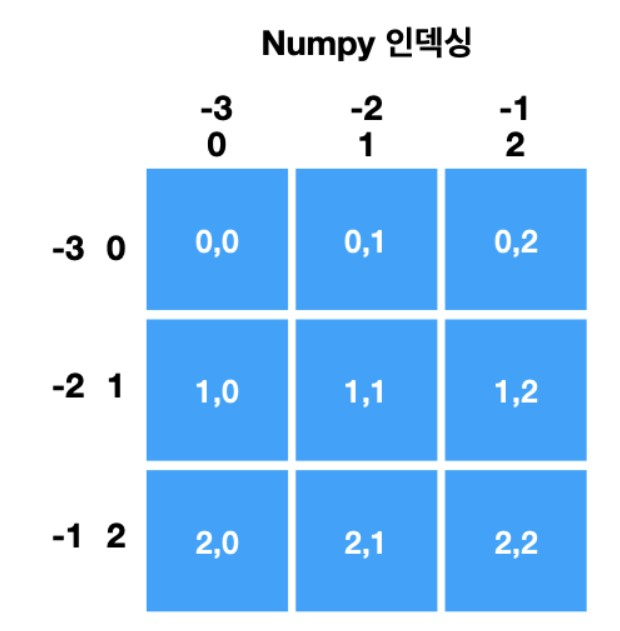

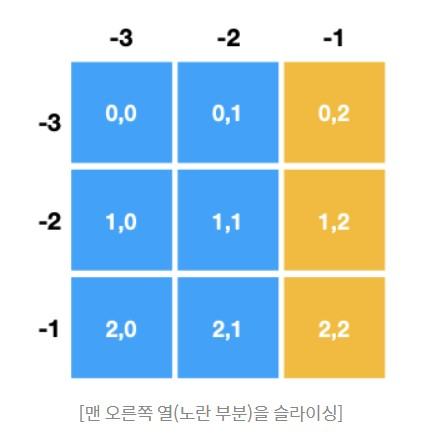

In [5]:
# 이 슬라이싱의 결과는 
print(A[:,2:])
print("--------------")
print(A[:,1:])
print("--------------")
print(A[:,:])
print("--------------")
# 이 슬라이싱의 결과와 동일
print(A[:,-1:])
print("--------------")
print(A[:,-2:])
print("--------------")
print(A[:,-3:])


[[2]
 [5]
 [8]]
--------------
[[1 2]
 [4 5]
 [7 8]]
--------------
[[0 1 2]
 [3 4 5]
 [6 7 8]]
--------------
[[2]
 [5]
 [8]]
--------------
[[1 2]
 [4 5]
 [7 8]]
--------------
[[0 1 2]
 [3 4 5]
 [6 7 8]]


* random
    * np.random.randint()
    * np.random.choice()
    * np.random.permutation()
    * np.random.normal()
    * np.random.uniform()

In [6]:
# 의사 난수 생성 예제

print(np.random.random())    # 0에서 1사이의 실수형 난수 하나를 생성

print(np.random.randint(0,10))    # 0~9 사이 1개 정수형 난수 하나를 생성

print(np.random.choice([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))    # 리스트에 주어진 값 중 하나를 랜덤하게 초이스

0.41705708365348226
8
2


In [7]:
# 무작위로 섞인 배열을 만들어 준다.
# 아래 2가지는 기능면에서 동일.

print(np.random.permutation(10))
print(np.random.permutation([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))

[8 2 3 9 1 0 4 5 6 7]
[2 6 1 8 7 4 5 3 9 0]


In [8]:
# 아래 기능들은 어떤 분포를 따르는 변수를 임의로 표본추출

# 정규분포를 따름
print(np.random.normal(loc = 0, scale = 1, size = 5))   # 평균(loc), 표준편차(scale), 추출개수(size)

# 균등분포를 따름
print(np.random.uniform(low = -1, high = 1, size = 5))   # 최소(low), 최대(high), 추출개수(size)


[-0.96607161 -2.1618833   0.97830883  0.0312485  -1.02216625]
[-0.45824675  0.11454499  0.06207931  0.81539135 -0.99296782]


* 전치행렬: 행렬의 행과 열을 맞바꾸기, 행렬의 축을 서로 바꾸기 등에 사용
    * 필수 습득 기능
        * arr.T: 행렬의 행과 열 맞바꾸기
        * np.transpose: 축을 기준으로 행렬의 행과 열 바꾸기

In [9]:
A = np.arange(24).reshape(2, 3, 4)
print("A:", A)
print("A의 전치행렬:", A.T)
print("A의 전치행렬의 shape:", A.T.shape)

A: [[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]
A의 전치행렬: [[[ 0 12]
  [ 4 16]
  [ 8 20]]

 [[ 1 13]
  [ 5 17]
  [ 9 21]]

 [[ 2 14]
  [ 6 18]
  [10 22]]

 [[ 3 15]
  [ 7 19]
  [11 23]]]
A의 전치행렬의 shape: (4, 3, 2)


In [10]:
# np.transpose는 행렬의 축을 어떻게 변환해 줄지 임의로 지정해 줄 수 있는 일반적인 행렬 전치 함수이다.
# np.transpose(A, (2, 1, 0)) 은 A.T와 정확히 같다.

B = np.transpose(A, (2, 0, 1))
print("A:", A)
print("B:", B)   # B는 A의 3, 1, 2번째 축을 자신의 1, 2, 3번째 축으로 가진 행렬
print("B.shape:", B.shape)

A: [[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]
B: [[[ 0  4  8]
  [12 16 20]]

 [[ 1  5  9]
  [13 17 21]]

 [[ 2  6 10]
  [14 18 22]]

 [[ 3  7 11]
  [15 19 23]]]
B.shape: (4, 2, 3)
